## Análise descritiva da PNAD COVID

#### Variáveis da PNAD Covid-19 utilizadas no estudo

Variável | Rótulo da PNAD COVID19 | Descrição 
:---: | :---: | :---
Gênero | A003 | Homem recebe valor 1 e mulher, valor 0.
Cor/Raça | A004 | Brancos e amarelos classificados como 1 e demais como 0.
Faixa etária | A002 | Faixas criadas com grupos de dez em dez anos, começando a partir de 20 anos e terminando em 80 anos ou mais.
Escolaridade | A005 | Classificado conforme o nível de escolaridade.
Região | UF | Macrorregiões do Brasil.
Formalidade | C007 e C007B | Trabalhadores no setor privado sem carteira, trabalhadores no setor público não estatutários e sem carteira assinada, desde que não contribuintes para a Previdência Social são classificados como informal.
Atividade | C007 e C007D | Identificado como as atividades de agricultura, comércio, setor público, serviços e indústria.
Ocupação | C001, C002, C003 | Pessoas classificadas como ocupadas, ocupadas e afastadas devido ao distanciamento social e pessoas ocupadas e afastadas devido a demais razões.
Trabalho remoto | C001 e C013 | Pessoas classificadas como ocupadas e realizando suas atividades de forma remota devido ao distanciamento social.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke


In [2]:
covid = pd.read_parquet('../Dados/pnad_covid/PNAD_COVID_ORIGINAL.parquet', 
                        columns=[
                            'V1013', # Mês
                            'UF',   # Unidade da Federação
                            'A002', # Idade
                            'A003',  # Genero
                            'A004', # Raca
                            'A005', # Escolaridade
                            'C007', # Trabalho
                            'C007B', # Formalidade
                            'C007D', # Atividade
                            'C001', # Ocupado
                            'C002', # Afastado
                            'C003', # Motivo Afastamento
                            'C013', # Trabalho Remoto
                            'V1032' # Peso amostral
                        ]
                    )

In [3]:
covid.rename(
    columns={
        'V1013':'Mes',
        'A002':'Idade',
        'A003':'Genero',
        'A004':'Raca',
        'A005':'Escolaridade',
        'C007':'Trabalho',
        'C007B':'Formalidade',
        'C007D':'Atividade',
        'C001':'Ocupado',
        'C002':'Afastado',
        'C003':'Motivo Afastamento',
        'C013':'Trabalho Remoto'
    }, 
    inplace=True
)

covid['Mes'] = covid['Mes'].astype(int)

## Um panorama do trabalho remoto efetivo no Brasil

### Distribuição de pessoas ocupadas no país (maio-nov. 2020)

Total de indivíduos ocupados e não afastados (Milhões de pessoas)

In [4]:
pd.DataFrame(
    pd.crosstab(
        covid['Ocupado'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
)

Mes,5,6,7,8,9,10,11
Ocupado,,,,,,,
Sim,66.948912,70.297861,73.427217,77.277309,79.438981,81.376565,82.147356
Não,102.944367,99.848061,96.781285,93.035053,91.091589,89.224464,88.594176


Total de indivíduos ocupados e afastados (Milhões de pessoas)

In [5]:
pd.DataFrame(
    pd.crosstab(
        covid['Afastado'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
)

Mes,5,6,7,8,9,10,11
Afastado,,,,,,,
Sim,19.794773,16.146552,13.432403,10.359341,8.543921,7.309743,6.801610
Não,83.149594,83.701508,83.348882,82.675711,82.547668,81.914720,81.792565


Total de indivíduos exercendo atividade de maneira remota (Milhões de pessoas)

In [6]:
pd.DataFrame(
    pd.crosstab(
        covid['Trabalho Remoto'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
)

Mes,5,6,7,8,9,10,11
Trabalho Remoto,,,,,,,
Sim,8.709329,8.693840,8.402772,8.375778,8.073412,7.595976,7.330083
Não,2.980050,2.804504,2.677128,2.671044,2.709836,2.730471,2.702766


Total de indivíduos afastado devido distanciamento social (Milhões de pessoas)

In [7]:
pd.DataFrame(
    pd.crosstab(
        covid['Motivo Afastamento'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
)

Mes,5,6,7,8,9,10,11
Motivo Afastamento,,,,,,,
"Estava em quarentena, isolamento, distanciamento social ou férias coletivas",16.225648,12.843700,10.007008,7.343046,5.692987,4.489388,3.972314
"Férias, folga ou jornada de trabalho variável",1.152122,0.902982,1.126913,0.786252,0.712174,0.697955,0.664521
Licença maternidade ou paternidade,0.321786,0.341383,0.318738,0.319375,0.308109,0.275566,0.270752
Licença remunerada por motivo de saúde ou acidente da própria pessoa,0.834744,0.841228,0.860515,0.844330,0.790414,0.801451,0.821973
"Outro tipo de licença remunerada (estudo, paternidade, casamento, licença prêmio, etc.)",0.076062,0.065343,0.061341,0.063794,0.074472,0.068954,0.059751
"Afastamento do próprio negócio/empresa por motivo de gestação, saúde, acidente, etc., sem ser remunerado por instituto de previdência",0.454887,0.434194,0.430967,0.422520,0.417780,0.407927,0.443965
"Fatores ocasionais (mau tempo, paralisação nos serviços de transportes, etc.)",0.187131,0.189531,0.172482,0.190817,0.152511,0.177889,0.171492
Outro motivo,0.542393,0.528193,0.454439,0.389207,0.395474,0.390614,0.396842


Total de indivíduos afastado por outros motivos (Milhões de pessoas)

In [8]:
pd.DataFrame(
    pd.crosstab(
        covid['Motivo Afastamento'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
).drop('Estava em quarentena, isolamento, distanciamento social ou férias coletivas', axis=0).sum(axis=0)

Mes
5     3.569125
6     3.302853
7     3.425395
8     3.016295
9     2.850934
10    2.820355
11    2.829297
dtype: float64

### Características das pessoas ocupadas em trabalho remoto (apenas para novembro de 2020)

In [9]:
covid_remoto_novembro = covid[(covid['Mes'] == 11) & (covid['Trabalho Remoto'] == 'Sim')]

Percentual de indivíduos no mercado formal e informal (em relação ao trabalho remoto)

In [10]:
trabalho_remoto_formalidade = pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Formalidade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000 
) / 7.330083 * 100

In [11]:
trabalho_remoto_formalidade

Mes,11
Formalidade,
"Sim, tem carteira de trabalho assinada",42.384234
"Sim, é servidor público estatutário",27.596268
Não,12.768229


Percentual de indivíduos no setor público e privado (em relação ao trabalho remoto)

In [12]:
pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Trabalho'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000 
) / 7.330083 * 100

Mes,11
Trabalho,
"Trabalhador doméstico (empregado doméstico, cuidados, babá)",0.000000
"Militar do exercito, marinha ou aeronáutica",0.158320
Policial militar ou bombeiro militar,0.076157
Empregado do setor privado,44.046609
Empregado do setor público (inclusive empresas de economia mista),38.702123
Empregador,2.475430
Conta própria,14.449023
Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente,0.092337
"Estava fora do mercado de trabalho (fazia apenas afazeres domésticos, cuidados de pessoas ou produção para próprio consumo)",0.000000


Percentual de indivíduos no por atividade (em relação ao trabalho remoto)

In [13]:
pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Atividade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000 
) / 7.330083 * 100

Mes,11
Atividade,
"Agricultura, pecuária, produção florestal e pesca",0.637001
"Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.",1.191792
Indústria da transformação (inclusive confecção e fabricação caseira),4.343664
"Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo",0.819738
Construção,1.511770
Comércio no atacado e varejo;,5.042686
Reparação de veículos automotores e motocicletas,0.151427
Transporte de passageiros,0.317039
Transporte de mercadorias,0.544420


Sexo

In [14]:
trabalho_remoto_sexo = pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Genero'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
) / 7.330083 * 100

trabalho_remoto_sexo

Mes,11
Genero,
Homem,42.161684
Mulher,57.838315


In [15]:
counts = trabalho_remoto_sexo[11].values.tolist()
names = trabalho_remoto_sexo.index.values.tolist()


# The positions for the bars
# This allows us to determine exactly where each bar is located
y = [i * 0.9 for i in range(len(names))]

#And let's also define the colors that are going to be used today.

# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

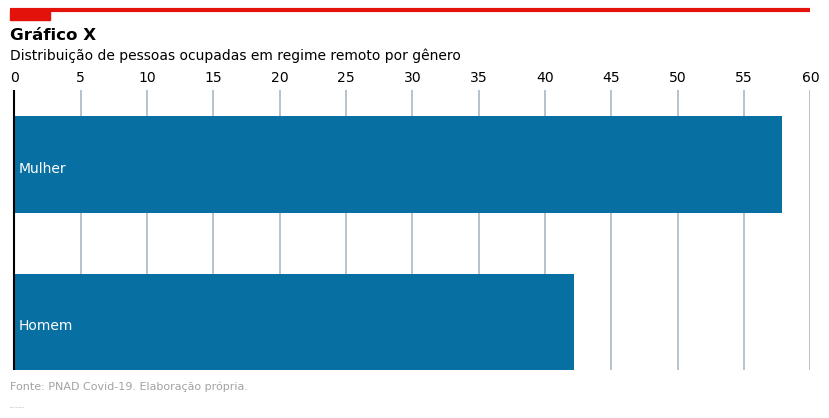

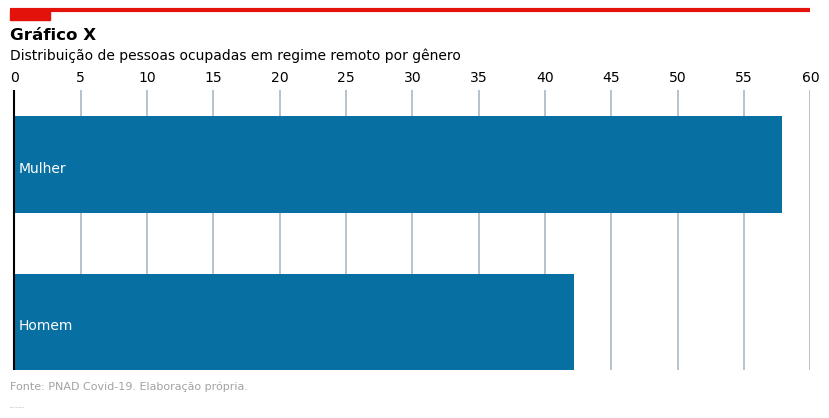

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

ax.xaxis.set_ticks([i * 5 for i in range(0, 14)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 14)], size=10)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 60))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
# This capstyle determines the lines don't go beyond the limit we specified
# see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontsize=10, va="center",
        path_effects=path_effects
    ) 
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Gráfico X", 
    fontsize=12, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Distribuição de pessoas ocupadas em regime remoto por gênero", 
    fontsize=10
)

# Add caption
source = "Fonte: PNAD Covid-19. Elaboração própria."
fig.text(
    0, 0.05, source, color=GREY, 
    fontsize=8
)

# Add authorship
fig.text(
    0, 0.005, "Elaboração prórpria.", color=GREY,
    fontsize=1
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))  # type: ignore
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")
fig   

FOrmalidade

In [17]:
pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Formalidade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
) / 7.330083 * 100

Mes,11
Formalidade,
"Sim, tem carteira de trabalho assinada",42.384234
"Sim, é servidor público estatutário",27.596268
Não,12.768229


In [18]:
counts = [12.76, 69.98]
names = ["Setor informal", "Setor formal"]

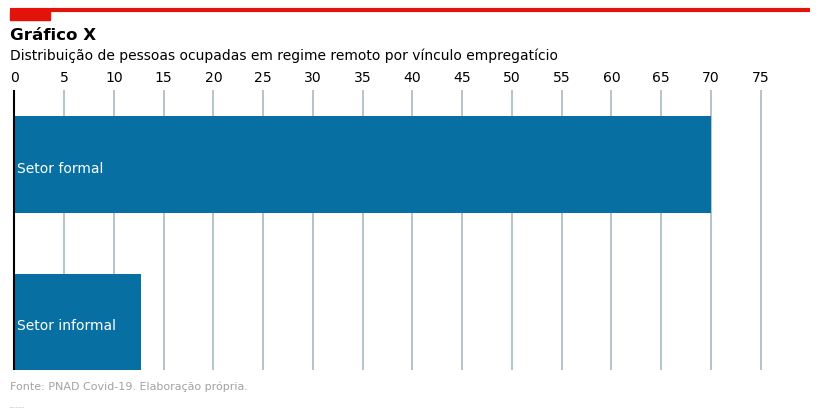

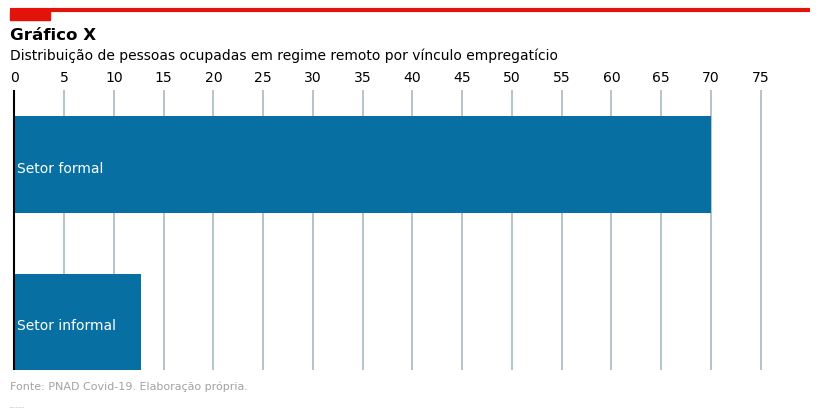

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

ax.xaxis.set_ticks([i * 5 for i in range(0, 16)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 16)], size=10)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 80))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
# This capstyle determines the lines don't go beyond the limit we specified
# see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontsize=10, va="center",
        path_effects=path_effects
    ) 
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Gráfico X", 
    fontsize=12, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Distribuição de pessoas ocupadas em regime remoto por vínculo empregatício", 
    fontsize=10
)

# Add caption
source = "Fonte: PNAD Covid-19. Elaboração própria."
fig.text(
    0, 0.05, source, color=GREY, 
    fontsize=8
)

# Add authorship
fig.text(
    0, 0.005, "Elaboração prórpria.", color=GREY,
    fontsize=1
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")
fig   

Escolaridade

In [20]:
trabalho_remoto_escolaridade = pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Escolaridade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
) / 7.330083 * 100

In [21]:
trabalho_remoto_escolaridade.index.to_list()

['Sem instrução',
 'Fundamental incompleto',
 'Fundamental completa',
 'Médio incompleto',
 'Médio completo',
 'Superior incompleto',
 'Superior completo',
 'Pós-graduação, mestrado ou doutorado']

In [154]:
counts = trabalho_remoto_escolaridade[11].values.tolist()
names = trabalho_remoto_escolaridade.index.to_list()

y = [i * 0.9 for i in range(len(names))]

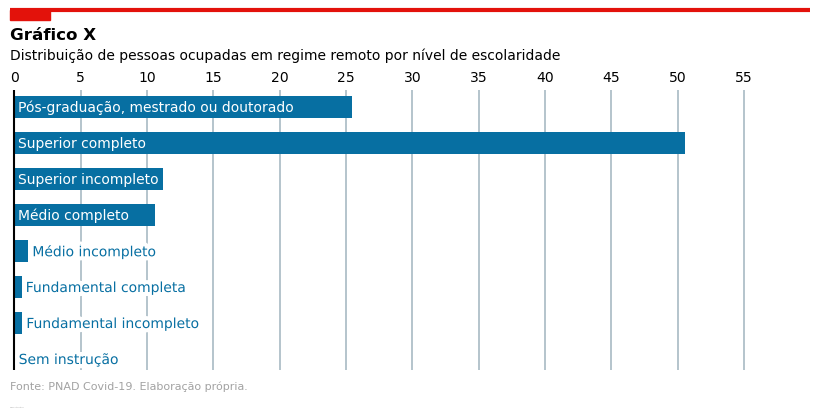

In [155]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

ax.xaxis.set_ticks([i * 5 for i in range(0, 12)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 12)], size=10)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 60))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
# This capstyle determines the lines don't go beyond the limit we specified
# see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontsize=10, va="center",
        path_effects=path_effects
    ) 
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Gráfico X", 
    fontsize=12, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Distribuição de pessoas ocupadas em regime remoto por nível de escolaridade", 
    fontsize=10
)

# Add caption
source = "Fonte: PNAD Covid-19. Elaboração própria."
fig.text(
    0, 0.05, source, color=GREY, 
    fontsize=8
)

# Add authorship
fig.text(
    0, 0.005, "Elaboração própria.", color=GREY,
    fontsize=1
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")

plt.show()

In [24]:
#TODO: Criar gráfico desagragado dos grupos de escolaridade por total de ocupadas antes de do trabalho remoto

pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Escolaridade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
) 

Mes,11
Escolaridade,
Sem instrução,0.001394
Fundamental incompleto,0.043634
Fundamental completa,0.040310
Médio incompleto,0.077105
Médio completo,0.775913
Superior incompleto,0.822614
Superior completo,3.705242
"Pós-graduação, mestrado ou doutorado",1.863871


In [25]:
pd.DataFrame(
    pd.crosstab(
        covid['Escolaridade'], 
        covid['Mes'], 
        values=covid['V1032'], 
        aggfunc='sum'
    )/1000000
)[[11]] 

Mes,11
Escolaridade,
Sem instrução,23.009122
Fundamental incompleto,64.442686
Fundamental completa,13.472590
Médio incompleto,20.149046
Médio completo,50.267381
Superior incompleto,12.515405
Superior completo,21.878257
"Pós-graduação, mestrado ou doutorado",5.917881


In [26]:
pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Atividade'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
) 

Mes,11
Atividade,
"Agricultura, pecuária, produção florestal e pesca",0.046693
"Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.",0.087359
Indústria da transformação (inclusive confecção e fabricação caseira),0.318394
"Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo",0.060087
Construção,0.110814
Comércio no atacado e varejo;,0.369633
Reparação de veículos automotores e motocicletas,0.011100
Transporte de passageiros,0.023239
Transporte de mercadorias,0.039906


Faixa Etária

In [36]:
covid_remoto_novembro['Faixa Etaria'] = pd.cut(
    covid_remoto_novembro['Idade'],
    bins=[14, 19, 29, 39, 49, 59, 69, 79, 100],
    labels=['14-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
)


/tmp/ipykernel_43633/2879039686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_remoto_novembro['Faixa Etaria'] = pd.cut(


In [112]:
trabalho_remoto_faixa_etaria = pd.DataFrame(
    pd.crosstab(
        covid_remoto_novembro['Faixa Etaria'], 
        covid_remoto_novembro['Mes'], 
        values=covid_remoto_novembro['V1032'], 
        aggfunc='sum'
    )/1000000
 ) / 7.330083 * 100

In [113]:
trabalho_remoto_faixa_etaria.reset_index(inplace=True)

In [140]:
trabalho_remoto_faixa_etaria['Faixa Etaria'].astype(str).to_list()

['14-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

In [146]:
counts = trabalho_remoto_faixa_etaria[11].values.tolist()
names = trabalho_remoto_faixa_etaria['Faixa Etaria'].astype(str).to_list()

x = [i * 0.9 for i in range(len(names))]

In [147]:
counts

[0.8495272218943495,
 20.085214847542982,
 31.83361094306124,
 25.013192244315334,
 15.394488138113486,
 5.744363454125307,
 0.9899662055601283,
 0.07418132309170306]

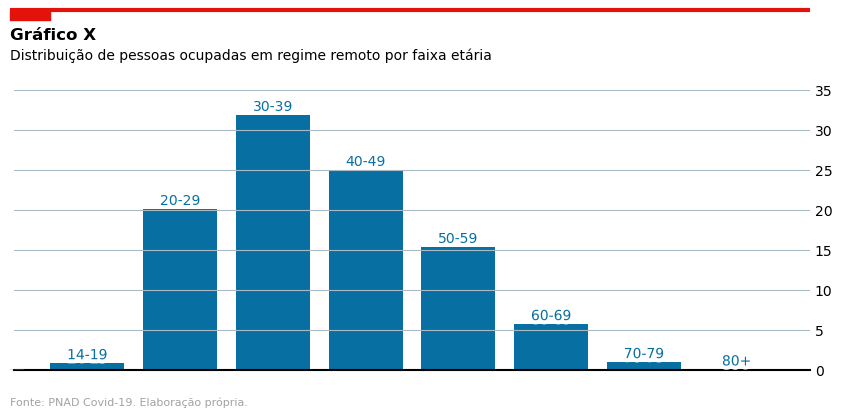

In [152]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(trabalho_remoto_faixa_etaria['Faixa Etaria'], trabalho_remoto_faixa_etaria[11], color=BLUE)

ax.yaxis.set_ticks([i * 5 for i in range(0, 8)])
ax.yaxis.set_ticklabels([i * 5 for i in range(0, 8)], size=10)
ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)


ax.grid(axis = "y", color="#A8BAC4", lw=0.8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_lw(1.5)
ax.spines["left"].set_visible(False)

# Hide x labels
ax.xaxis.set_visible(False)

#add label for each bar 

for name, count, x_pos in zip(names, counts, x):

    y = 0
    color = "white"
    path_effects = None
    if count < 8:
        y = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]

    ax.text(
        x_pos, count + 0.5, name, 
        color=BLUE, fontsize=10, ha="center",
        path_effects=path_effects
    )


# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Gráfico X", 
    fontsize=12, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Distribuição de pessoas ocupadas em regime remoto por faixa etária", 
    fontsize=10
)

# Add caption
source = "Fonte: PNAD Covid-19. Elaboração própria."
fig.text(
    0, 0.01, source, color=GREY, 
    fontsize=8
)

# Add authorship
fig.text(
    0, 0.1, "Elaboração própria.", color=GREY,
    fontsize=1
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")

plt.show()


In [32]:
#TODO: Matriz de Markov